<h1><center> UFU - Universidade Federal de Uberlândia</center></h1>

<h2><center>Graduação em Engenharia Civil</center></h2>

<h3><center>INICIAÇÃO CIENTÍFICA</center><br>
TÍTULO: DESENVOLVIMENTO DE MODELOS DE PREVISÃO DE CHUVAS USANDO
APRENDIZADO DE MÁQUINA <br>
<br>
ALUNO: Pedro Augusto Toledo Rios</h3>

<p>Este notebook é referente à Iniciação Ciêntífica na área de Ciência da Computação/Ánalise de Dados .</p>

## Modelo de Regressão - Ajustado - Período Chuvoso


## Importações e Configurações iniciais

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sn

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import  metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 20)

import matplotlib.pyplot as plt

import seaborn as sns # Statistical data visualization

import plotly.graph_objects as go
import plotly.express as px
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, Dense, Dropout, Masking, Embedding

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Análise Exploratória dos Dados

In [2]:
#Tratamento de dados
missing_values = ['n/a','na','*****','*','*******',' -', '******', '5..84', '3..66', '3.3.21', '1..41', '********', '3.7.94', '354.59*', '564..79', '5.04.24', '21:36','**********', '***', '*********', '03:18', '00:00', '03:48', '08:42', '03:06', '09:06', '01:30', '07:48', '09:12', '10:18', '01:24', '#VALUE!' , '926,4923,8', '27/07/1902**21:36:00', '-', '926.4923.8']

dados_clima = pd.read_csv('C:/Users/auped/OneDrive - Universidade Federal de Uberlândia/Área de Trabalho/python 05-11/pesquisa/dadosclima_PERIODOCHUVOSO.csv', header = None, sep=';', na_values=missing_values)
dados_clima.columns=['Max Temperature (°C)', 'Min Temperature (°C)', 'Average temperature (°C)', 'Wind Speed (km/h)', 'Solar Radiation (cal/cm²/h)', 'Pressure (mb)', 'Relative humidity (%)', 'Chuva (mm)', 'Month', 'Year', 'Chuvoso/Seco']
dados_clima['Relative humidity (%)'] = dados_clima['Relative humidity (%)'].astype(float)
dados_clima['Pressure (mb)'] = dados_clima['Pressure (mb)'].astype(float)
dados_clima['Year'] = dados_clima['Year'].str.replace(',,', '')
dados_clima['Year'] = dados_clima['Year'].astype(int)




chuva = dados_clima['Chuva (mm)']

#Primeiras cinco linhas dos dados pós-tratados
dados_clima.head()
dados_clima.dropna()

#Número de missing values encontrdos em cada coluna
print(dados_clima.isnull().sum())

Max Temperature (°C)           116
Min Temperature (°C)           114
Average temperature (°C)       103
Wind Speed (km/h)              308
Solar Radiation (cal/cm²/h)    214
Pressure (mb)                  206
Relative humidity (%)          831
Chuva (mm)                      93
Month                            0
Year                             0
Chuvoso/Seco                     0
dtype: int64


In [3]:
dados_clima.describe()

,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (km/h),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Chuva (mm),Month,Year,Chuvoso/Seco
count,6534.000000,6536.000000,6547.000000,6.342000e+03,6.436000e+03,6444.000000,5819.000000,6557.000000,6650.000000,6650.000000,6650.0
mean,29.187940,16.265805,22.752215,3.362675e+07,9.456402e+06,937.156394,72.876817,6.337525,6.480902,2000.751579,1.0
std,3.262865,2.754950,2.555708,4.006549e+08,8.693298e+07,238.104756,18.162298,12.832244,4.575137,10.537214,0.0
min,2.000000,1.600000,0.000000,0.000000e+00,0.000000e+00,28.800000,0.000000,0.000000,1.000000,1983.000000,1.0
25%,27.400000,14.800000,21.400000,1.730000e+00,3.331600e+02,927.800000,64.400000,0.000000,2.000000,1992.000000,1.0
50%,29.600000,16.600000,23.200000,2.760000e+00,4.351900e+02,931.600000,74.000000,0.000000,3.000000,2001.000000,1.0
75%,31.400000,18.200000,24.475000,4.430000e+00,5.216500e+02,935.800000,83.800000,6.600000,11.000000,2010.000000,1.0
max,39.200000,28.600000,34.200000,9.677917e+09,4.869536e+09,9925.800000,905.000000,158.400000,12.000000,2019.000000,1.0


In [4]:
dftabela = dados_clima.describe() 
dftabela.to_excel("tabelaestatistica.xlsx")


### Criação de uma nova classe que determina se naquele dia choveu ou não

In [5]:

# Loop que preenche a nova coluna com 0(não choveu) e 1(choveu)
for dados_clima in combine:    
    dados_clima.loc[ dados_clima['Chuva (mm)'] == 0, 'Choveu?'] = 0
    dados_clima.loc[(dados_clima['Chuva (mm)'] > 0), 'Choveu?'] = 1

#Visualização das primeiras cinco linhas da tabela
dados_clima.head()   



,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (km/h),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Chuva (mm),Month,Year,Chuvoso/Seco,Choveu?
0,26.8,14.0,20.4,3.39,340.16,926.1,88.5,23.6,1.0,1983,1.0,1.0
1,27.2,13.0,20.1,3.02,340.16,927.6,86.6,20.4,1.0,1983,1.0,1.0
2,27.4,17.2,22.3,5.97,370.18,930.0,87.2,21.2,1.0,1983,1.0,1.0
3,28.2,17.0,22.6,4.25,420.20,931.3,8.0,0.0,1.0,1983,1.0,0.0
4,29.0,18.2,23.6,3.25,160.08,931.4,91.8,40.0,1.0,1983,1.0,1.0


In [6]:
print('\nMissing Values no dataframe:\n',dados_clima.isnull().sum(), sep="")


Missing Values no dataframe:
Max Temperature (°C)           116
Min Temperature (°C)           114
Average temperature (°C)       103
Wind Speed (km/h)              308
Solar Radiation (cal/cm²/h)    214
Pressure (mb)                  206
Relative humidity (%)          831
Chuva (mm)                      93
Month                            0
Year                             0
Chuvoso/Seco                     0
Choveu?                         93
dtype: int64


In [7]:
#Tratar os Missing Values (Valores Ausentes)

dados_clima['Min Temperature (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Average temperature (°C)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Wind Speed (km/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última velocidade antes do Missing Value
dados_clima['Solar Radiation (cal/cm²/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última radiação antes do Missing Value
dados_clima['Relative humidity (%)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última taxa UR antes do Missing Value
dados_clima['Chuva (mm)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última quantidade antes do Missing Value
dados_clima['Pressure (mb)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Choveu?'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Max Temperature (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value



#verificar os missing values após a imputação acima
print('\nMissing Values no dataframe  após o tratamento:\n',dados_clima.isnull().sum(), sep="")


Missing Values no dataframe  após o tratamento:
Max Temperature (°C)           0
Min Temperature (°C)           0
Average temperature (°C)       0
Wind Speed (km/h)              0
Solar Radiation (cal/cm²/h)    0
Pressure (mb)                  0
Relative humidity (%)          0
Chuva (mm)                     0
Month                          0
Year                           0
Chuvoso/Seco                   0
Choveu?                        0
dtype: int64


In [8]:
# Usamos a correlação de Pearson e ordenamos os valores
columns_corr = dados_clima.corr(method='pearson')['Chuva (mm)'].sort_values()
print(columns_corr)

Max Temperature (°C)          -0.210822
Month                         -0.086310
Average temperature (°C)      -0.082334
Solar Radiation (cal/cm²/h)   -0.004900
Wind Speed (km/h)             -0.003291
Year                           0.000459
Pressure (mb)                  0.005342
Min Temperature (°C)           0.097777
Relative humidity (%)          0.159584
Choveu?                        0.501269
Chuva (mm)                     1.000000
Chuvoso/Seco                        NaN
Name: Chuva (mm), dtype: float64


## Seleção do Período para Análise

In [9]:
# 70% para treino / 30% para teste

data_inicio = 1980
data_fim = 2020
data_inicio_treinamento = 1980
data_fim_treinamento = 2008
data_inicio_teste = 2009
data_fim_teste = 2019


In [10]:
dados_clima.drop(dados_clima.loc[dados_clima['Chuva (mm)']==0].index, inplace=True)

In [11]:
dadosparateste = dados_clima.copy()

#Criando uma nova coluna de chuva para ficar no final do dataframe

qtdchuva = dadosparateste['Chuva (mm)']


dadosparateste['Chuva att (mm)'] = qtdchuva

#Visualização das primeiras cinco linhas da tabela
dadosparateste.head()  

,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (km/h),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Chuva (mm),Month,Year,Chuvoso/Seco,Choveu?,Chuva att (mm)
0,26.8,14.0,20.4,3.39,340.16,926.1,88.5,23.6,1.0,1983,1.0,1.0,23.6
1,27.2,13.0,20.1,3.02,340.16,927.6,86.6,20.4,1.0,1983,1.0,1.0,20.4
2,27.4,17.2,22.3,5.97,370.18,930.0,87.2,21.2,1.0,1983,1.0,1.0,21.2
4,29.0,18.2,23.6,3.25,160.08,931.4,91.8,40.0,1.0,1983,1.0,1.0,40.0
5,25.4,19.0,22.2,4.82,280.13,928.2,93.4,53.2,1.0,1983,1.0,1.0,53.2


In [12]:
dadosparateste.drop(columns = ['Chuva (mm)'], axis = 1, inplace=True)


## Criar funções que serão utilizadas por todos os Modelos

In [13]:
# Library para statmodels
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error

#Definir funções que serão utilizadas por todos os modelos de predição

#Imprimir mensagens de erro da predição
def imprimir_scores_predicao(strModel, y_target, arPredict):
  #print(strModel, ' - R2: ', r2_score(y_target, arPredict))
  print(strModel, ' - MAE:  ', mean_absolute_error(y_target, arPredict))
  print(strModel, ' - MAPE: ', mean_absolute_percentage_error(y_target, arPredict))
  #print(strModel, ' - MSE: ', mean_squared_error(y_target, arPredict))
  print(strModel, ' - RMSE: ', np.sqrt(mean_squared_error(y_target, arPredict)))
  print(strModel, ' - MSE: ',mean_squared_error(y_target, arPredict))
  print(strModel, ' - R2: ',r2_score(y_target, arPredict))
  #mse = metrics.mean_squared_error(y, yhat)
  
  
def imprimir_graficos_predicao(strModel, y_target, arPredict):
  
  df_Test_Predicted = y_target.copy()
  df_Test_Predicted['Daily rain (mm)'] = arPredict

  #Plotagem dos dados de teste e dados previstos
  plt.figure(figsize=(16,8))
  plt.plot(y_target.loc['Dia'], y_target, color = 'blue', label = 'Chuva Real')
  plt.plot(y_target.loc['Dia'], arPredict, color = 'red', label = 'Chuva Prevista')
  font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 13.5,
        }
  plt.title('Comparação entre o real e o previsto pelo modelo', fontdict=font)
  plt.xlabel('Período')
  plt.ylabel('Quantidade de chuva')
  plt.legend()
  plt.grid(True)
  #plt.savefig('lstm2.pdf')
  plt.show() 
  

# Modelos de Aprendizado de Máquina (Machine Learning) - Regressão

In [14]:
#Criar os dataframe de Treinamento e Teste
df_train =  dadosparateste[dadosparateste['Year'] >= data_inicio_treinamento]
df_train =  dadosparateste[dadosparateste['Year'] <= data_fim_treinamento]
df_test = dadosparateste[dadosparateste['Year'] >= data_inicio_teste]
df_test =  dadosparateste[dadosparateste['Year'] <= data_fim_teste]

X_train = df_train.iloc[:,0:9]
y_train = df_train[['Chuva att (mm)']]

X_test = df_test.iloc[:,0:9]
y_test = df_test[['Chuva att (mm)']]

X_test.head()

,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (km/h),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Month,Year
0,26.8,14.0,20.4,3.39,340.16,926.1,88.5,1.0,1983
1,27.2,13.0,20.1,3.02,340.16,927.6,86.6,1.0,1983
2,27.4,17.2,22.3,5.97,370.18,930.0,87.2,1.0,1983
4,29.0,18.2,23.6,3.25,160.08,931.4,91.8,1.0,1983
5,25.4,19.0,22.2,4.82,280.13,928.2,93.4,1.0,1983


# XGBOOST 

In [22]:
import xgboost as xgb

In [23]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 100, alpha = 1, n_estimators = 100000)

In [24]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[18:25:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [25]:
imprimir_scores_predicao("XGBoost", y_test, preds)


XGBoost  - MAE:   3.685289643312257
XGBoost  - MAPE:  2.322923212400342
XGBoost  - RMSE:  9.251805196549146
XGBoost  - MSE:  85.59589939489378
XGBoost  - R2:  0.6553323069061587


In [30]:
chuvaprevista = []
for z in range(len(preds)):
    #print(y_pred4[z])
    chuvaprevista.append(preds[z])
    
df_test['Previsão']= chuvaprevista
df_test.tail()    

,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (km/h),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Month,Year,Chuvoso/Seco,Choveu?,Chuva att (mm),Previsão
6633,30.2,20.2,25.2,2.50,433407936.0,924.3,72.8,3.0,2019,1.0,1.0,18.1,14.031500
6634,33.2,19.8,26.5,2.42,51324624.0,925.2,50.0,3.0,2019,1.0,1.0,13.0,16.382980
6635,30.6,19.6,25.1,2.51,470025504.0,925.3,77.3,3.0,2019,1.0,1.0,2.0,10.126401
6637,29.4,20.2,24.8,0.82,316952064.0,922.9,80.5,3.0,2019,1.0,1.0,1.2,13.747156
6639,29.2,19.0,24.1,2.68,45621888.0,922.3,76.8,3.0,2019,1.0,1.0,17.8,15.558767


In [31]:

df_test = df_test[df_test['Year']>= 1980]
df_test =  df_test[df_test['Year'] <= 2000]

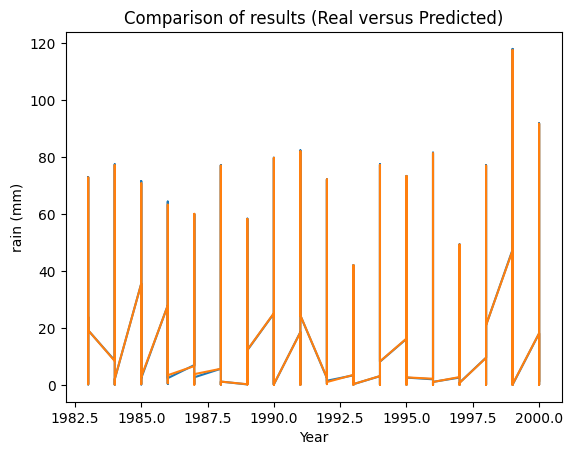

In [32]:
x = df_test['Year']
y_real = df_test['Chuva att (mm)']
y_pred = df_test['Previsão']
plt.title('Comparison of results (Real versus Predicted)')
plt.xlabel('Year')
plt.ylabel('rain (mm)')

plt.plot(x, y_real, label = 'Real')
plt.plot(x, y_pred, label = 'Predicted')

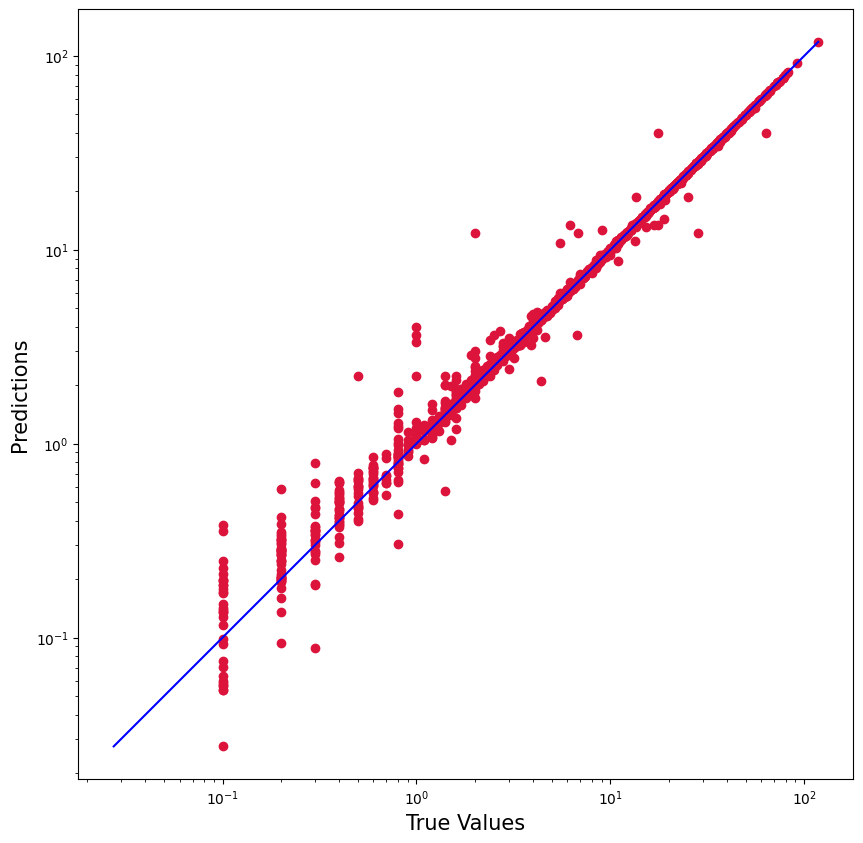

In [33]:
plt.figure(figsize=(10,10))

true_value = df_test['Chuva att (mm)']
predicted_value = df_test['Previsão']
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [34]:
df_test.to_excel("regchuvoso.xlsx")